### Testing

In [1]:
import pysimdeum
import pysimdeum.core.utils as utils

In [2]:
house = pysimdeum.built_house(house_type='family')

/Users/val.ismaili/DAA/pysimdeum/pysimdeum/core/utils.py:286: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.1667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  s.iloc[start:end] = intensity
/Users/val.ismaili/DAA/pysimdeum/pysimdeum/core/utils.py:342: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.6723566666666668' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  discharge_pattern.loc[discharge_start:discharge_end - pd.Timedelta(seconds=1)] = discharge_rate # restrict range to not be inclusive of final timstamp as this would result in extra discharge
/Users/val.ismaili/DAA/pysimdeum/pysimdeum/core/utils.py:342: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '

In [3]:
house.appliances

[WcNormal(name='WcNormal'),
 BathroomTap(name='BathroomTap'),
 Dishwasher(name='Dishwasher'),
 KitchenTap(name='KitchenTap'),
 OutsideTap(name='OutsideTap'),
 NormalShower(name='NormalShower'),
 WashingMachine(name='EndUse')]

In [4]:
consumption, discharge = house.simulate(duration='1 day', num_patterns=1, simulate_discharge=True, spillover=True)

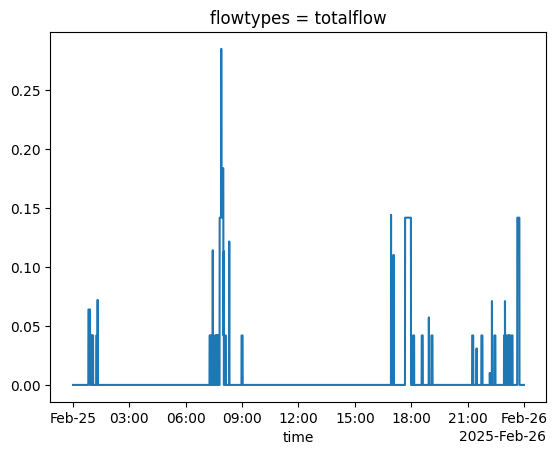

In [5]:
consumption.sum(['enduse', 'user']).sel(flowtypes='totalflow').mean(['patterns']).plot()

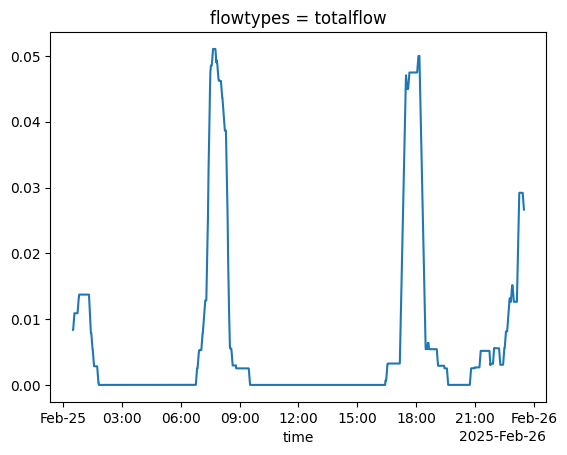

In [6]:
consumption.sum(['enduse', 'user']).sel(flowtypes='totalflow').mean(['patterns']).rolling(time=3600, center=True).mean().plot()

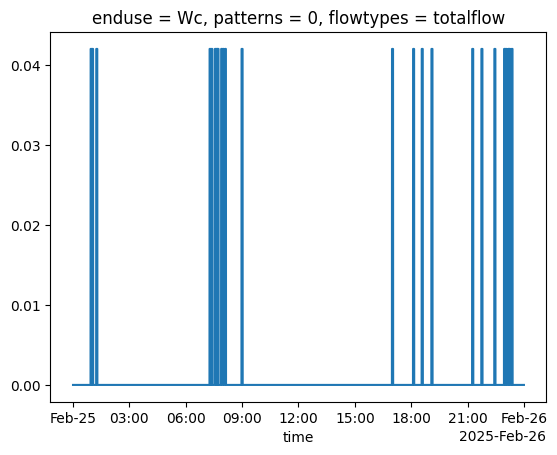

In [7]:
consumption.sum(["user"]).sel(enduse="Wc").sel(flowtypes="totalflow").plot()

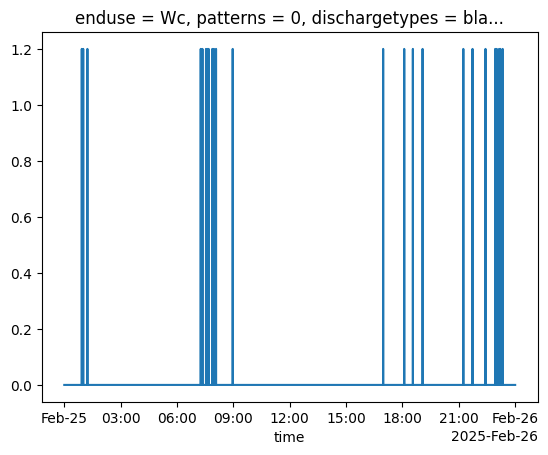

In [8]:
discharge.sum(["user"]).sel(enduse="Wc").sel(dischargetypes="blackwater").plot()

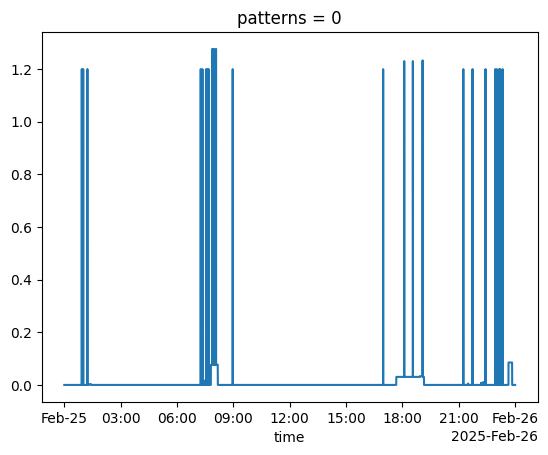

In [9]:
discharge.sum(["enduse","user","dischargetypes"]).plot()

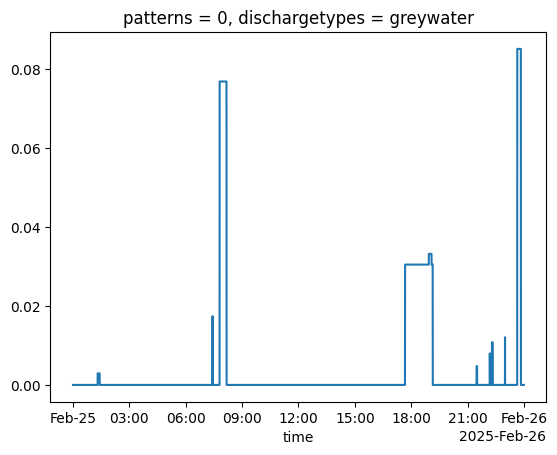

In [10]:
discharge.sum(["enduse","user"]).sel(dischargetypes="greywater").plot()

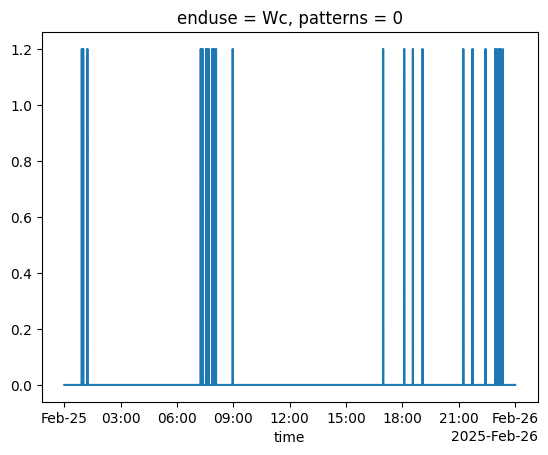

In [11]:
discharge.sum(["user","dischargetypes"]).sel(enduse="Wc").plot()

In [12]:
discharge

<xarray.DataArray (time: 86401, user: 4, enduse: 7, patterns: 1,
                   dischargetypes: 2)> Size: 39MB
array([[[[[0., 0.]],

         [[0., 0.]],

         [[0., 0.]],

         ...,

         [[0., 0.]],

         [[0., 0.]],

         [[0., 0.]]],


        [[[0., 0.]],

         [[0., 0.]],

         [[0., 0.]],
...
         [[0., 0.]],

         [[0., 0.]],

         [[0., 0.]]],


        [[[0., 0.]],

         [[0., 0.]],

         [[0., 0.]],

         ...,

         [[0., 0.]],

         [[0., 0.]],

         [[0., 0.]]]]])
Coordinates:
  * time            (time) datetime64[ns] 691kB 2025-02-25 ... 2025-02-26
  * user            (user) <U9 144B 'user_1' 'user_2' 'user_3' 'household'
  * enduse          (enduse) <U14 392B 'Wc' 'BathroomTap' ... 'WashingMachine'
  * patterns        (patterns) int64 8B 0
  * dischargetypes  (dischargetypes) <U10 80B 'greywater' 'blackwater'

### xarray.DataArray attrs

In [13]:
# dims - names of axes
discharge.dims

('time', 'user', 'enduse', 'patterns', 'dischargetypes')

In [14]:
# coords - named dimensions and corresponding values
discharge.coords

Coordinates:
  * time            (time) datetime64[ns] 691kB 2025-02-25 ... 2025-02-26
  * user            (user) <U9 144B 'user_1' 'user_2' 'user_3' 'household'
  * enduse          (enduse) <U14 392B 'Wc' 'BathroomTap' ... 'WashingMachine'
  * patterns        (patterns) int64 8B 0
  * dischargetypes  (dischargetypes) <U10 80B 'greywater' 'blackwater'

In [15]:
discharge.dischargetypes

<xarray.DataArray 'dischargetypes' (dischargetypes: 2)> Size: 80B
array(['greywater', 'blackwater'], dtype='<U10')
Coordinates:
  * dischargetypes  (dischargetypes) <U10 80B 'greywater' 'blackwater'

In [16]:
discharge.coords['dischargetypes']

<xarray.DataArray 'dischargetypes' (dischargetypes: 2)> Size: 80B
array(['greywater', 'blackwater'], dtype='<U10')
Coordinates:
  * dischargetypes  (dischargetypes) <U10 80B 'greywater' 'blackwater'

In [17]:
discharge.attrs

{}

## Applying nutrient concentration

In [18]:
ds = utils.process_discharge_nutrients(discharge)

In [19]:
ds

<xarray.Dataset> Size: 543MB
Dimensions:         (time: 86401, user: 4, enduse: 7, patterns: 1,
                     dischargetypes: 2, index: 4838456, columns: 12)
Coordinates:
  * time            (time) datetime64[ns] 691kB 2025-02-25 ... 2025-02-26
  * user            (user) <U9 144B 'user_1' 'user_2' 'user_3' 'household'
  * enduse          (enduse) <U14 392B 'Wc' 'BathroomTap' ... 'WashingMachine'
  * patterns        (patterns) int64 8B 0
  * dischargetypes  (dischargetypes) <U10 80B 'greywater' 'blackwater'
Dimensions without coordinates: index, columns
Data variables:
    discharge       (time, user, enduse, patterns, dischargetypes) float64 39MB ...
    df              (index, columns) object 464MB 2025-02-25 'user_1' ... 0.0
    df_index        (index) int64 39MB 0 1 2 3 ... 4838453 4838454 4838455
    df_columns      (columns) object 96B 'time' 'user' 'enduse' ... 'ss' 'amm'

In [20]:
df = utils.dataset_to_df(ds)
df[df['flow'] != 0]

,time,user,enduse,patterns,dischargetypes,flow,n,p,cod,bod5,ss,amm
187559,2025-02-25 00:55:49,user_2,Wc,0,blackwater,1.2,0.12,0.24,0.36,0.48,0.6,0.72
187615,2025-02-25 00:55:50,user_2,Wc,0,blackwater,1.2,0.12,0.24,0.36,0.48,0.6,0.72
187671,2025-02-25 00:55:51,user_2,Wc,0,blackwater,1.2,0.12,0.24,0.36,0.48,0.6,0.72
187727,2025-02-25 00:55:52,user_2,Wc,0,blackwater,1.2,0.12,0.24,0.36,0.48,0.6,0.72
187783,2025-02-25 00:55:53,user_2,Wc,0,blackwater,1.2,0.12,0.24,0.36,0.48,0.6,0.72
...,...,...,...,...,...,...,...,...,...,...,...,...
4805048,2025-02-25 23:50:04,user_2,Shower,0,greywater,0.085162,0.008516,0.017032,0.025549,0.034065,0.042581,0.051097
4805104,2025-02-25 23:50:05,user_2,Shower,0,greywater,0.085162,0.008516,0.017032,0.025549,0.034065,0.042581,0.051097
4805160,2025-02-25 23:50:06,user_2,Shower,0,greywater,0.085162,0.008516,0.017032,0.025549,0.034065,0.042581,0.051097
4805216,2025-02-25 23:50:07,user_2,Shower,0,greywater,0.085162,0.008516,0.017032,0.025549,0.034065,0.042581,0.051097
